In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "rrrrrrrrrr"

In [20]:
# Load required libraries
library(ggplot2)
library(readr)

# Load the dataset
data <- read.csv('/kaggle/input/rrrrrrrrrr/data_PCA.csv')


In [21]:
# Check the first few rows of the dataset
head(data)

# Check the structure of the dataset
str(data)


,Region,Geo,Country,Territory,Quarter,Month,BU,PL,SKU,SKU_Desc,⋯,RTM,DealDescription,MCcode,Gross_Revenue,At.Net.SO,NDP.SO,BO.COGS,Total_Discount,Gross.Margin,Quantity
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,AMS,LASER LATIN AMERICA,CANADA,Unknown,Q1,DEC,Compute,96 - Industry Standard Servers Support,U9075AC,U9075AC,⋯,Indirect,NA,-1,0.00,-0.477,0.00,0.00,0.477,-0.477,1
2,AMS,LASER LATIN AMERICA,CANADA,Unknown,Q1,DEC,Hybrid Cloud,RN - Primera Support,HA156AC,HA156AC,⋯,Indirect,NA,-1,8136.00,3785.090,8136.00,0.00,4350.910,3785.090,9
3,AMS,LASER LATIN AMERICA,CANADA,Unknown,Q1,DEC,Hybrid Cloud,RN - Primera Support,HU4A1AC,UNKNOWN,⋯,Indirect,NA,-1,32976.00,15341.083,32976.00,0.00,17634.917,15341.083,12
4,AMS,LASER LATIN AMERICA,CANADA,Unknown,Q1,DEC,Hybrid Cloud,RN - Primera Support,HU4A2AC,UNKNOWN,⋯,Indirect,NA,-1,65448.00,30449.009,65448.00,0.00,34998.991,30449.009,24
5,AMS,NORTH AMERICA,CANADA,Central-North Central,Q1,DEC,Edge,I5 - Instant On Wired,JL815A,Aruba IOn 1830 48G 4SFP 370W Sw,⋯,Indirect,NA,09R,859.14,506.890,859.14,280.25,352.250,226.640,1
6,AMS,NORTH AMERICA,CANADA,Central-North Central,Q1,JAN,Edge,3P - Instant On Wireless,R4W02A,Instant On AP22 (RW) Access Point,⋯,Indirect,NA,09R,777.03,419.580,777.03,225.75,357.450,193.830,3


'data.frame':	40330 obs. of  32 variables:
 $ Region          : chr  "AMS" "AMS" "AMS" "AMS" ...
 $ Geo             : chr  "LASER LATIN AMERICA" "LASER LATIN AMERICA" "LASER LATIN AMERICA" "LASER LATIN AMERICA" ...
 $ Country         : chr  "CANADA" "CANADA" "CANADA" "CANADA" ...
 $ Territory       : chr  "Unknown" "Unknown" "Unknown" "Unknown" ...
 $ Quarter         : chr  "Q1" "Q1" "Q1" "Q1" ...
 $ Month           : chr  "DEC" "DEC" "DEC" "DEC" ...
 $ BU              : chr  "Compute" "Hybrid Cloud" "Hybrid Cloud" "Hybrid Cloud" ...
 $ PL              : chr  "96 - Industry Standard Servers Support" "RN - Primera Support" "RN - Primera Support" "RN - Primera Support" ...
 $ SKU             : chr  "U9075AC" "HA156AC" "HU4A1AC" "HU4A2AC" ...
 $ SKU_Desc        : chr  "U9075AC" "HA156AC" "UNKNOWN" "UNKNOWN" ...
 $ BU.SubCategory  : chr  "Compute Services" "Storage Services" "Storage Services" "Storage Services" ...
 $ DealID          : int  -1 -1 -1 -1 98823445 98823445 98824147 -1 160006

### Code Explanation
The code generates a correlation heatmap for numeric variables using the `corrplot` package, visualizing the strength and direction of relationships between variables. It displays correlation coefficients on the plot for better interpretation.


corrplot 0.92 loaded



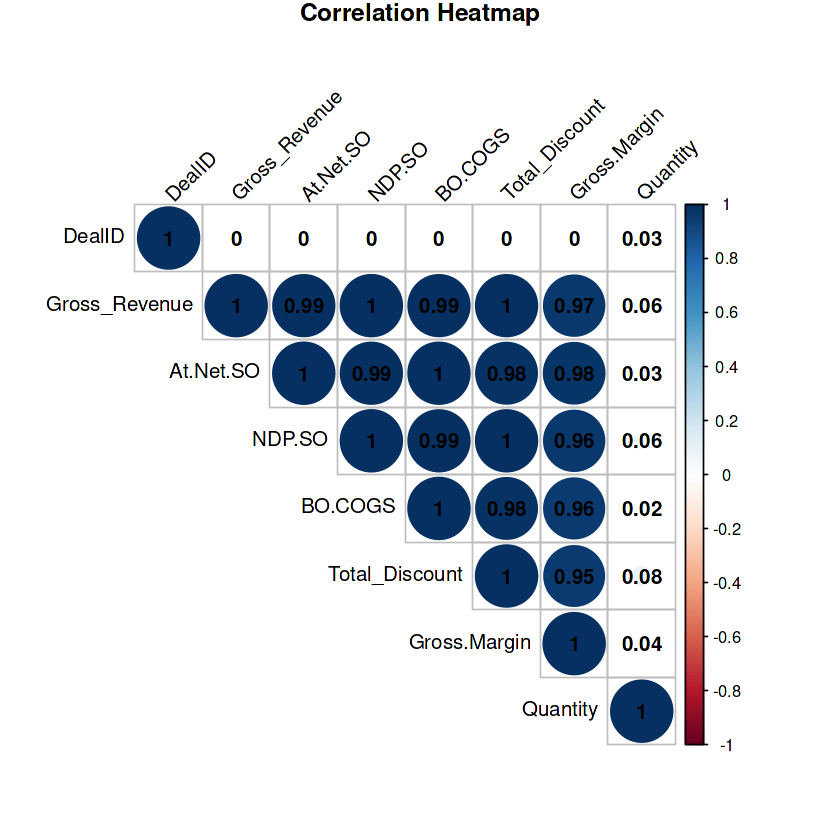

In [23]:
# Correlation heatmap
library(corrplot)
cor_matrix <- cor(data[, sapply(data, is.numeric)])  # Select numeric columns
corrplot(cor_matrix, method = "circle", type = "upper", 
         tl.col = "black", tl.srt = 45, 
         title = "Correlation Heatmap", 
         mar = c(0,0,1,0), addCoef.col = "black")


### Code Explanation

This code performs a series of steps to analyze and preprocess a dataset, focusing on categorical features and their relationship with the target variable, **Gross Margin**. Below is a summary of each step along with its visualizations:

1. **Dataset Loading and Missing Value Handling**: 
   - The dataset is loaded, and rows with missing values in the 'Gross Margin' column are removed.
   
2. **Target Variable Preprocessing**: 
   - The target variable is set as the **Gross Margin**.

3. **Categorical Variable Analysis**:
   - A selection of categorical features is analyzed for their impact on **Gross Margin** by calculating the mean **Gross Margin** per category.

4. **One-Hot Encoding**: 
   - Categorical features are encoded using **one-hot encoding** to convert them into a numeric form.

5. **Feature Selection Using F-test (ANOVA)**:
   - **ANOVA** is used to assess the impact of each categorical feature on the continuous **Gross Margin** target. The top 5 features are selected based on their F-test scores.

6. **Dimensionality Reduction using PCA**:
   - **Principal Component Analysis (PCA)** is applied to the selected categorical features to reduce their dimensionality while retaining important information.

7. **Add Selected Feature Back to Original Data**:
   - The most important categorical feature (based on ANOVA scores) is added back to the original dataframe for further visualization.

8. **Visualizations**:
   - **PCA Explained Variance**: A plot of the variance explained by the principal components.
   - **Scree Plot**: A plot showing the cumulative variance explained by the components.
   - **Impact of Selected Categorical Feature on Gross Margin**: A boxplot to visualize how different categories of the selected feature impact **Gross Margin**.
   - **Feature Importance (F-test Scores)**: A bar plot showing the F-test scores for the top selected categorical features.


[1] "Categorical Impact on Gross Margin:"
# A tibble: 6 × 11
  Pricing_Type Membership       Customer_Segment Disc_Type BU     BU.SubCategory
  <chr>        <chr>            <chr>            <chr>     <chr>  <chr>         
1 Escalated    BUSINESS PARTNER COMMERCIAL       Backend   Compu… Compute Produ…
2 Escalated    BUSINESS PARTNER COMMERCIAL       Backend   Compu… Compute Produ…
3 Escalated    BUSINESS PARTNER COMMERCIAL       Backend   Edge   Edge Product  
4 Escalated    BUSINESS PARTNER COMMERCIAL       Backend   Edge   Edge Product  
5 Escalated    BUSINESS PARTNER COMMERCIAL       Backend   Edge   Edge Services 
6 Escalated    BUSINESS PARTNER COMMERCIAL       UPFRONT   Compu… Compute Produ…
# ℹ 5 more variables: Pricing_Touch <chr>, RTM <chr>, MCcode <chr>, Geo <chr>,
#   Gross.Margin <dbl>
[1] "Selected Categorical Features and their F-test scores:"
                                                                            Feature
BU.SubCategoryHPC & AI Solutions Products BU

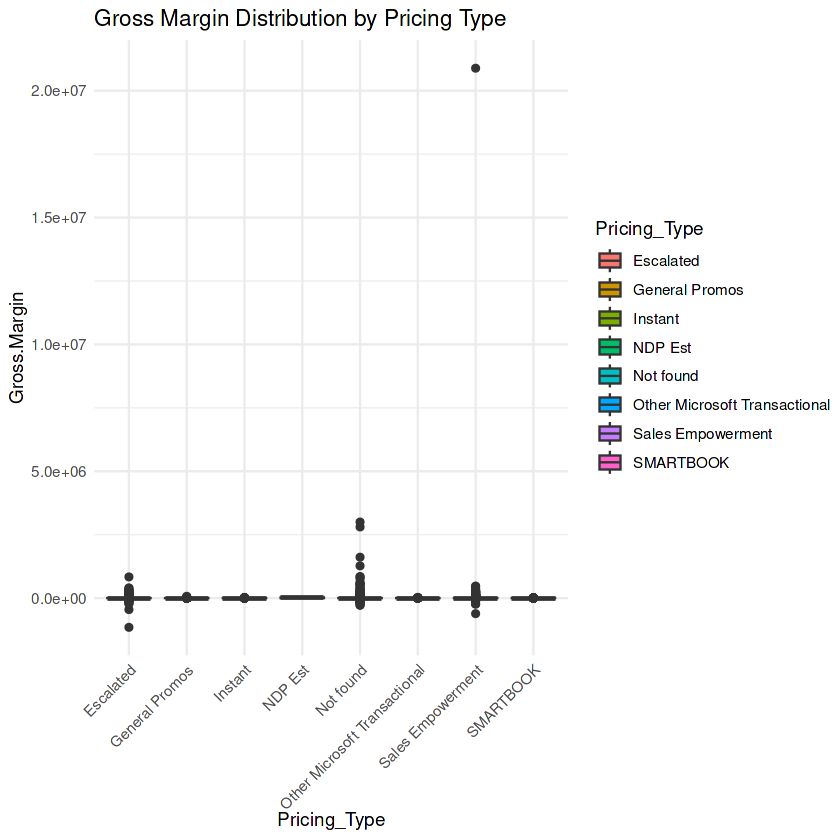

In [18]:
# Load necessary libraries
library(tidyverse)
library(caret)
library(FSelectorRcpp)
library(FactoMineR)
library(factoextra)

# -----------------------------
# 1. Load dataset and handle missing values
df <- read.csv("/kaggle/input/rrrrrrrrrr/data_PCA.csv")  # Update path if needed
df <- df %>% drop_na(Gross.Margin)  # Drop rows with missing 'Gross Margin'

# -----------------------------
# 2. Preprocess target variable: Use original Gross Margin as continuous target
target <- df$Gross.Margin  # Continuous target

# -----------------------------
# 3. Focus on the categorical variables
categorical_cols <- c("Pricing_Type", "Membership", "Customer_Segment", "Disc_Type", "BU", 
                      "BU.SubCategory", "Pricing_Touch", "RTM", "MCcode", "Geo")

# (Optional) Analyze impact of categorical features on Gross Margin
categorical_impact <- df %>%
  group_by(across(all_of(categorical_cols))) %>%
  summarise(Gross.Margin = mean(Gross.Margin, na.rm = TRUE), .groups = "drop")
print("Categorical Impact on Gross Margin:")
print(head(categorical_impact))

# Visualize one example impact (e.g., Pricing_Type)
ggplot(df, aes(x = Pricing_Type, y = Gross.Margin, fill = Pricing_Type)) +
  geom_boxplot() +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Gross Margin Distribution by Pricing Type")

# -----------------------------
# 4. Encode categorical data using one-hot encoding
encoded_df <- dummyVars(" ~ .", data = df[categorical_cols], fullRank = TRUE)
categorical_encoded <- predict(encoded_df, df)
categorical_df <- as.data.frame(categorical_encoded)

# -----------------------------
# 5. Feature Selection using F-test (ANOVA) for continuous target
anova_scores <- sapply(categorical_df, function(x) anova(lm(target ~ x))[["F value"]][1])
selected_features <- names(sort(anova_scores, decreasing = TRUE)[1:5])  # Select top 5 features
selected_scores <- anova_scores[selected_features]

print("Selected Categorical Features and their F-test scores:")
print(data.frame(Feature = selected_features, Score = selected_scores))

# -----------------------------
# 6. Dimensionality Reduction using PCA on the selected categorical features
final_df <- categorical_df[selected_features]
pca_model <- PCA(final_df, scale.unit = TRUE, ncp = ncol(final_df))
pca_df <- as.data.frame(pca_model$ind$coord)
colnames(pca_df) <- paste0("PC", 1:ncol(pca_df))

print("PCA Reduced Data (First 5 Rows):")
print(head(pca_df))

# -----------------------------
# 7. Add the top selected categorical feature back to the original dataframe
# This ensures the column is available in df for plotting.
df <- df %>% mutate(!!selected_features[1] := categorical_df[[selected_features[1]]])

# -----------------------------
# 8. Visualizations

# Visualize the explained variance ratio of the principal components
fviz_eig(pca_model, addlabels = TRUE, barfill = "blue", linecolor = "red") +
  labs(title = "PCA Explained Variance (Selected Categorical Data)")

# Scree plot for PCA (cumulative variance explained)
fviz_screeplot(pca_model, ncp = 10) +
  labs(title = "Scree Plot")

# Visualize the impact of the selected categorical feature on Gross Margin using .data pronoun
ggplot(df, aes(x = factor(.data[[selected_features[1]]]), y = Gross.Margin, 
               fill = factor(.data[[selected_features[1]]]))) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = paste("Gross Margin Distribution by", selected_features[1]),
       x = selected_features[1])

# Visualize the F-test scores of the selected categorical features
ggplot(data.frame(Feature = selected_features, Score = selected_scores), 
       aes(x = Feature, y = Score, fill = Feature)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Feature Importance (F-test Scores) for Selected Categorical Features")


# Analysis of Categorical Data using MCA and PCA

## Objective

The goal of the analysis is to explore how categorical variables influence the target variable, Gross Margin, by using **Multiple Correspondence Analysis (MCA)**. Additionally, the code involves a comparison with **Principal Component Analysis (PCA)**, commonly used for dimensionality reduction on continuous data.

---

## What is Multiple Correspondence Analysis (MCA)?

**Multiple Correspondence Analysis (MCA)** is a method used to analyze and visualize the relationships between categorical variables. MCA is an extension of Correspondence Analysis (CA), designed to work with more than two categorical variables. It helps in reducing the dimensionality of large categorical datasets and identifying patterns or trends.

MCA is particularly useful when the data consists of several categorical variables, and we are interested in visualizing how the levels of these variables interact with each other and with the target variable. By transforming the original data into a lower-dimensional space, MCA helps simplify complex relationships, making them easier to interpret.

---

## Why Apply MCA?

- **Handling Categorical Data**: PCA works best with continuous numerical data, while MCA is specifically designed for categorical data. MCA can help you uncover relationships between the different levels of categorical variables, which would not be possible using PCA directly.
  
- **Dimensionality Reduction**: MCA reduces the complexity of high-dimensional categorical data, making it easier to visualize patterns and relationships that would otherwise be hard to spot. This is important when dealing with many categorical variables with multiple levels.

- **Data Interpretation**: MCA allows for a more meaningful representation of categorical data in reduced dimensions, which can be helpful when trying to understand how the categories relate to each other and the target variable.

---

## Why Apply PCA?

**Principal Component Analysis (PCA)** is a popular technique for dimensionality reduction, primarily used on continuous variables. PCA transforms the original variables into a smaller set of uncorrelated components, each capturing the maximum variance present in the data. However, PCA is not ideal for categorical data as it assumes numerical relationships between variables, which might not always be the case with categorical data.

Although PCA is a powerful method, when the dataset is composed of categorical variables, applying PCA would not be appropriate. That's where MCA comes in—MCA can be seen as a categorical analog to PCA. 

---

## Code Walkthrough

### Step 1: Load and Preprocess the Data
- The dataset is read, and rows with missing values in the **Gross Margin** column are dropped. This ensures the analysis is based on complete data.
  
### Step 2: Define the Target Variable
- **Gross Margin** is selected as the continuous target variable. This will be used to understand how the categorical variables influence the gross margin.

### Step 3: Focus on Categorical Variables
- We specify a set of categorical columns and extract these from the dataset.
- The columns are then converted to factors, which is necessary for MCA to interpret them correctly.

### Step 4: Perform MCA
- The **MCA()** function is applied to the categorical data, reducing its dimensionality.
- The `ncp` parameter is set to the number of columns in the dataset, ensuring all available components are extracted for analysis.

### Step 5: Visualize MCA Results
- **Eigenvalues Plot**: Helps to understand the amount of variance explained by each principal component.
- **Individuals Plot**: Displays how observations (rows) are distributed across the reduced dimensions.
- **Variables Plot**: Shows how categories (levels) of each categorical variable are positioned in the reduced space.

### Step 6: Feature Selection (Optional)
- **F-test (ANOVA)** is used to determine the impact of each categorical feature on the target variable (Gross Margin).
- The top 5 features with the highest F-values are selected, indicating their significant relationship with Gross Margin.

### Step 7: Visualizing the Impact on Gross Margin
- A boxplot is created to visualize the distribution of **Gross Margin** based on the selected categorical feature. This helps to identify how different categories influence the target.

---

## Conclusion

- **MCA** provides a powerful method for analyzing categorical data, allowing for a better understanding of how different levels of variables relate to each other and to the target variable, Gross Margin.
- **PCA**, on the other hand, is more suited for continuous data, while MCA is specifically designed for categorical data. When working with categorical variables, MCA should be the method of choice.
  
By using MCA, we can effectively reduce the complexity of categorical datasets, uncover relationships, and visualize patterns that may not be obvious at first glance.

---

## Key Takeaways

- **MCA** is essential for analyzing categorical data, as it handles complex relationships between categories and simplifies interpretation.
- **PCA** is not applicable to categorical data, so MCA is the better choice for such datasets.
- Feature selection using ANOVA can help in identifying which categorical variables most significantly impact the target variable.



In [29]:
# Install and load necessary packages
install.packages("FactoMineR")
install.packages("factoextra")
install.packages("dplyr")

library(FactoMineR)
library(factoextra)
library(dplyr)

# -----------------------------
# 1. Load the dataset and handle missing values
df <- read.csv("/kaggle/input/uuuuuuuu/data_PCA.csv")  # Update the path if needed
df <- df %>% drop_na(Gross.Margin)  # Drop rows with missing 'Gross Margin'

# -----------------------------
# 2. Preprocess the target variable
target <- df$Gross.Margin  # Continuous target

# -----------------------------
# 3. Focus on categorical variables
categorical_cols <- c("Pricing_Type", "Membership", "Customer_Segment", "Disc_Type", "BU", 
                      "BU.SubCategory", "Pricing_Touch", "RTM", "MCcode", "Geo")

# Create a subset with just the categorical data
categorical_data <- df[categorical_cols]

# Convert categorical columns to factors (required for MCA)
categorical_data[] <- lapply(categorical_data, as.factor)

# -----------------------------
# 4. Perform Multiple Correspondence Analysis (MCA)
mca_result <- MCA(categorical_data, ncp = ncol(categorical_data))

# View the results of MCA
summary(mca_result)

# -----------------------------
# 5. Visualize the results

# Eigenvalues plot to check the explained variance
fviz_eig(mca_result, addlabels = TRUE, barfill = "blue", linecolor = "red") +
  labs(title = "MCA - Eigenvalues Plot")

# Individuals plot: Show how the rows (observations) are distributed
fviz_mca_ind(mca_result, 
             col.ind = "blue", 
             addEllipses = TRUE,
             label = "none") +
  labs(title = "MCA - Individuals Plot")

# Variables plot: Show the categories (levels) of each variable in the reduced space
fviz_mca_var(mca_result, 
             col.var = "green", 
             label = "none") +
  labs(title = "MCA - Variables Plot")

# -----------------------------
# 6. Feature Selection: (Optional - Using F-test / ANOVA for categorical impact)
anova_scores <- sapply(categorical_data, function(x) anova(lm(target ~ x))[["F value"]][1])
selected_features <- names(sort(anova_scores, decreasing = TRUE)[1:5])  # Select top 5 features
selected_scores <- anova_scores[selected_features]

print("Selected Categorical Features and their F-test scores:")
print(data.frame(Feature = selected_features, Score = selected_scores))

# -----------------------------
# 7. Visualizing the selected categorical feature's impact on Gross Margin
ggplot(df, aes(x = factor(.data[[selected_features[1]]]), y = Gross.Margin, 
               fill = factor(.data[[selected_features[1]]]))) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = paste("Gross Margin Distribution by", selected_features[1]),
       x = selected_features[1])

# -----------------------------
# 8. Summary of the Analysis
print("MCA results summary:")
summary(mca_result)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Call:
MCA(X = categorical_data, ncp = ncol(categorical_data)) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               0.539   0.353   0.285   0.244   0.207   0.201   0.184
% of var.              9.973   6.531   5.284   4.517   3.838   3.720   3.398
Cumulative % of var.   9.973  16.503  21.787  26.304  30.143  33.863  37.261
                       Dim.8   Dim.9  Dim.10  Dim.11  Dim.12  Dim.13  Dim.14
Variance               0.172   0.139   0.124   0.117   0.114   0.110   0.107
% of var.              3.185   2.577   2.297   2.174   2.115   2.034   1.983
Cumulative % of var.  40.446  43.024  45.320  47.495  49.610  51.644  53.627
                      Dim.15  Dim.16  Dim.17  Dim.18  Dim.19  Dim.20  Dim.21
Variance               0.106   0.105   0.105   0.103   0.103   0.101   0.101
% of var.              1.972   1.949   1.947   1.912   1.900   1.877   1.877
Cumulative % of var.  55.599  57.548  59.496  61.408  63.308  65.185  67.06

# Detailed Explanation of Refined Visualizations in MCA

## Objective

The goal of these visualizations is to present the results of the Multiple Correspondence Analysis (MCA) in a more refined and interpretable manner. This helps in understanding the variance explained by each component, how individuals (observations) are distributed in the reduced space, and how the categories of each variable relate to each other. Additionally, we enhance the visualization of the impact of categorical features on the target variable, **Gross Margin**.

---

## 1. **Eigenvalues Plot**: Variance Explained by Each Dimension

### Code:
```r
fviz_eig(mca_result, addlabels = TRUE, barfill = "blue", linecolor = "red") +
  labs(title = "MCA - Eigenvalues Plot",
       subtitle = "Variance explained by each dimension",
       x = "Dimensions",
       y = "Eigenvalues") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


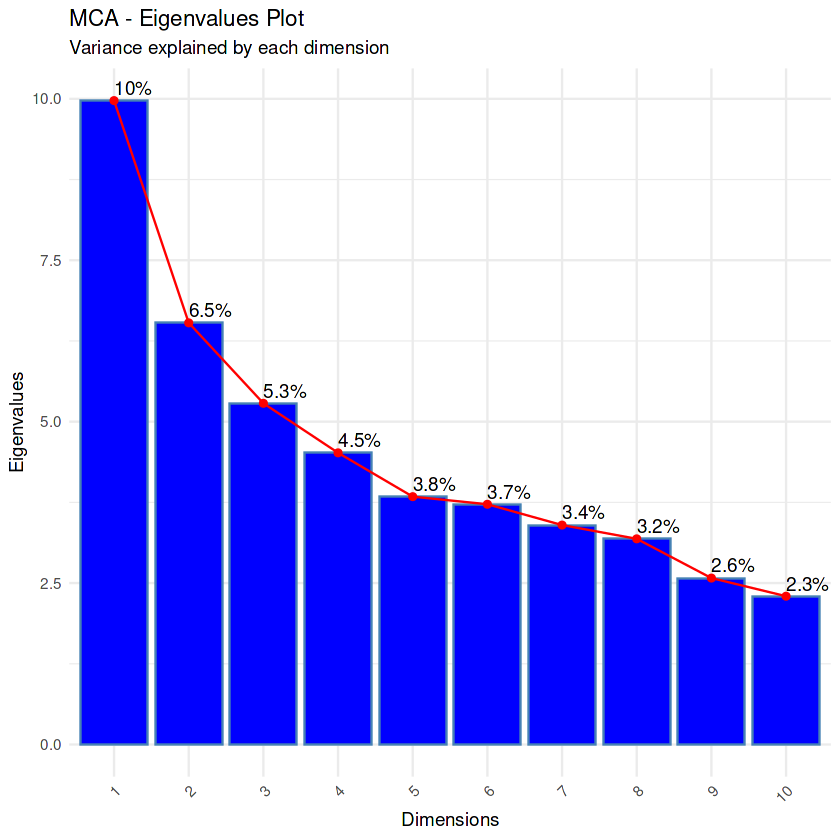

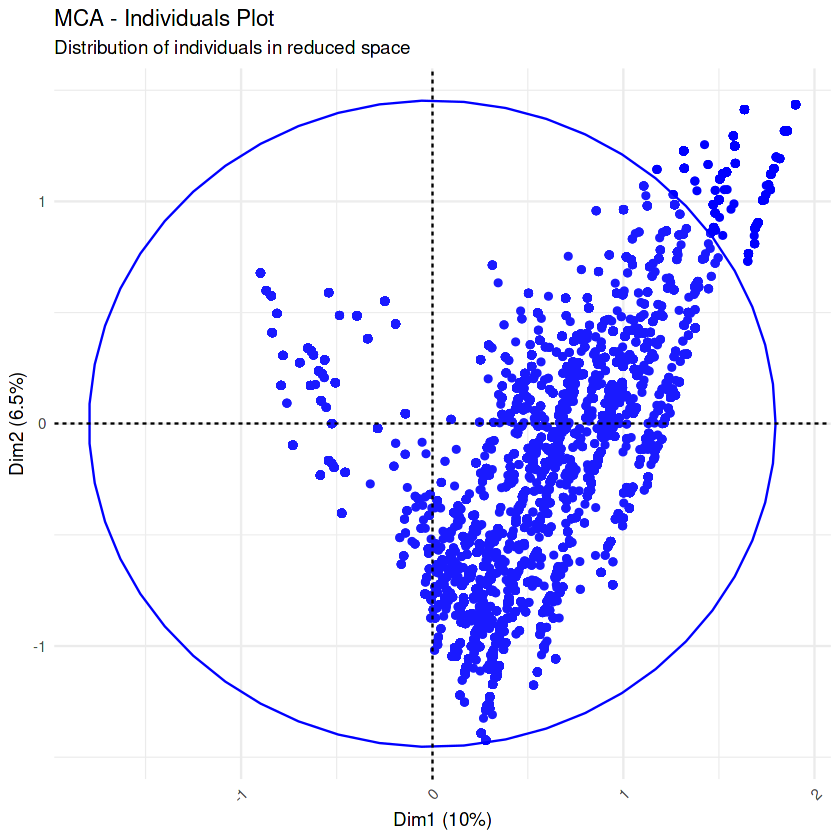

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set3 is 12
Returning the palette you asked for with that many colors
”


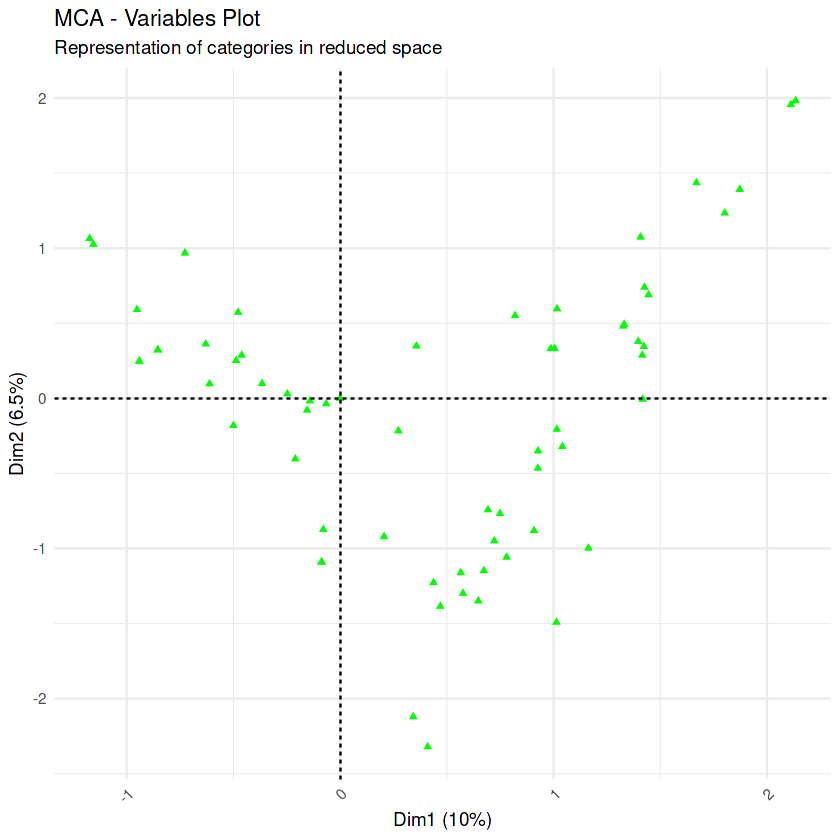

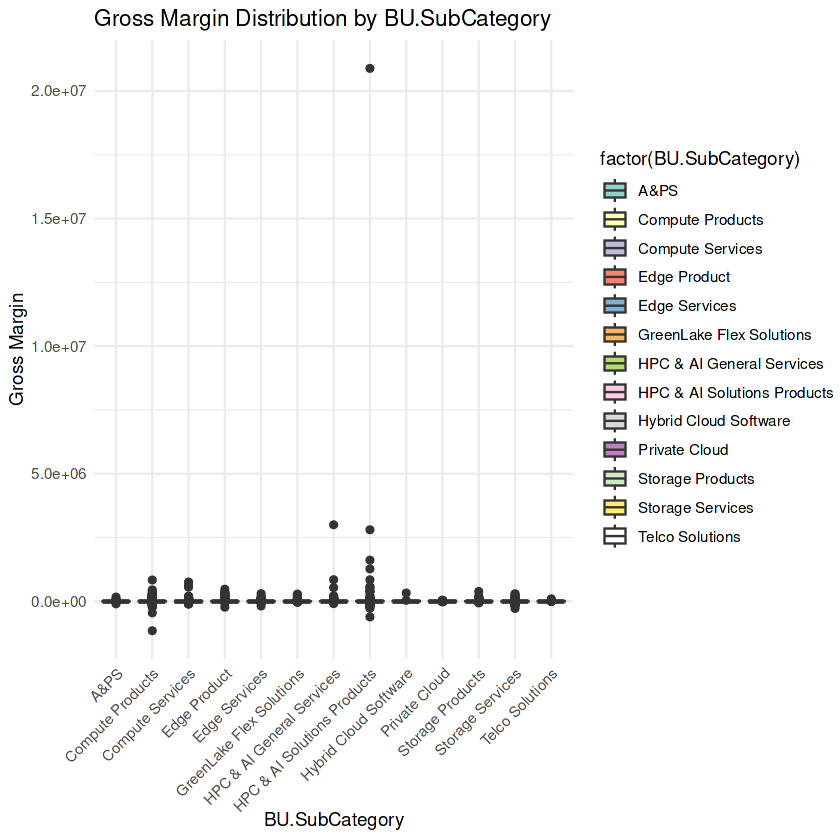

In [30]:
# -----------------------------
# Refined Visualizations

# Eigenvalues plot to check the explained variance
fviz_eig(mca_result, addlabels = TRUE, barfill = "blue", linecolor = "red") +
  labs(title = "MCA - Eigenvalues Plot",
       subtitle = "Variance explained by each dimension",
       x = "Dimensions",
       y = "Eigenvalues") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Individuals plot: Show how the rows (observations) are distributed
fviz_mca_ind(mca_result, 
             col.ind = "blue", 
             addEllipses = TRUE, # Add ellipses around the points for better interpretation
             label = "none") + 
  labs(title = "MCA - Individuals Plot",
       subtitle = "Distribution of individuals in reduced space") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Variables plot: Show the categories (levels) of each variable in the reduced space
fviz_mca_var(mca_result, 
             col.var = "green", 
             label = "none") +
  labs(title = "MCA - Variables Plot",
       subtitle = "Representation of categories in reduced space") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Refined boxplot for the selected feature
ggplot(df, aes(x = factor(.data[[selected_features[1]]]), y = Gross.Margin, 
               fill = factor(.data[[selected_features[1]]]))) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = paste("Gross Margin Distribution by", selected_features[1]),
       x = selected_features[1], 
       y = "Gross Margin") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "Set3") # Use a distinct color palette

